# Phone Scammer Prediction

In this project, we use a real-world dataset from a telecom company. Our goal is to identified if a user is a fraudulent user or not based on various characteristics of the user.

Originally, the dataset consists of 116 columns and 101363 samples. 

Contents:

1.Data collection

2.Exploratory Data Analysis

2.1 Overview

  2.2 Tagret variable
  
  2.3 Numeric columns and target variable
  
  2.4 Catogorcial columns and target variable
  
3.Data proprecessing

  3.1 Missing values
  
  3.2 Outliers
  
  3.3 Delete Invalid Rows
  
  3.4 Encode data
 
4.Feature engineering

  4.1 New Features Creation
  
  4.2 Features Selection
 
5.Modelling and Evaluation

  5.1 Random Forest
  
  5.2 XGBOOST
  
  5.3 Naive Bayes
 
 6.Conclusion

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from scipy.stats import kstest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## 1. Data collection 

In [3]:
col_name = ['stat_date','user_id','serial_number','guanting_date','guanting_bcyc_id','join_months','sex_code','age'
,'single_phone_flag','term_merge_flag','star_level','ronghe_flag','chnl_id','eparchy_code',
'id_user_cnt','imei_user_cnt','rizuka_flag','maker','version','waisheng_id_iccid','tousu_flag'
,'xieru_flag','sms_num','sms_act_days','lac_cell_cnt','day_lac_cnt_lm1','night_lac_cnt_lm1','day_lac_cnt_lm2'
,'night_lac_cnt_lm2','act_voice_days_lm1','act_voice_days_lm2','act_voice_days_lm3','act_voice_days',
'day_call_num_lm1','day_call_num_lm2','day_call_num_lm3','day_call_num','night_call_num_lm1'
,'night_call_num_lm2','night_call_num_lm3','night_call_num','call_dura_lm1','call_dura_lm2','call_dura_lm3'
,'call_dura','call_num_lm1','call_num_lm2','call_num_lm3','call_num','other_cnt_lm1','other_cnt_lm2'
,'other_cnt_lm3','other_cnt','calling_num_lm1','calling_num_lm2','calling_num_lm3','calling_num'
,'calling_other_cnt_lm1','calling_other_cnt_lm2','calling_other_cnt_lm3','calling_other_cnt'
,'call_gongzhong_flag_lm1','call_gongzhong_flag_lm2','call_gongzhong_flag_lm3','call_gongzhong_flag'
,'call_60s_interval_times','call_300s_interval_times','call_60s_interval_ratio','call_300s_interval_ratio'
,'call_45s_times_lm1','call_300s_times_lm1','call_500s_times_lm1','call_45s_times_lm2','call_300s_times_lm2'
,'call_500s_times_lm2','call_45s_times','call_300s_times','call_500s_times','call_45s_times_ratio_lm1'
,'call_300s_times_ratio_lm1','call_500s_times_ratio_lm1','call_45s_times_ratio_lm2','call_300s_times_ratio_lm2'
,'call_500s_times_ratio_lm2','call_45s_times_ratio','call_300s_times_ratio','call_500s_times_ratio'
,'call_1day_huibo_times','call_huibo_times','call_1day_huibo_ratio','call_huibo_ratio','zhujiao_call_interval'
,'beijiao_call_interval','period','other_number_age_avg','other_number_agevar_pop','sex_11_ratio','sex_12_ratio'
,'other_waisheng_ratio','waisheng_cnt','open_act_flag','main_prd_flow','main_feeset_dura','main_prod_fee_lm1'
,'main_prod_fee_lm2','main_prod_fee_lm3','total_fee_lm1','total_fee_lm2','total_fee_lm3','main_ratio_lm1','main_ratio_lm2'
,'dura_ratio_lm1','dura_ratio_lm2','open_date','chnl_kind_code']

In [4]:
# call detail records_scammers.csv contains inforamtion of fraudulent users, while call detail records_normal users.csv contains information of normal users. 

data_plus = pd.read_csv('call detail records_scammers.csv',sep = ',',names = col_name,index_col=False, header = None,encoding = 'utf-8')

data_minus = pd.read_csv('call detail records_normal users.csv',sep = ',',names = col_name ,index_col=False, header = None,encoding = 'utf-8')

data_plus['label']=1
data_minus['label']=0

In [5]:
data_all = pd.concat([data_plus,data_minus],axis =0)
data_all = data_all.reset_index(drop = True)
data_all.head()

,stat_date,user_id,serial_number,guanting_date,guanting_bcyc_id,join_months,sex_code,age,single_phone_flag,term_merge_flag,star_level,ronghe_flag,chnl_id,eparchy_code,id_user_cnt,imei_user_cnt,rizuka_flag,maker,version,waisheng_id_iccid,tousu_flag,xieru_flag,sms_num,sms_act_days,lac_cell_cnt,day_lac_cnt_lm1,night_lac_cnt_lm1,day_lac_cnt_lm2,night_lac_cnt_lm2,act_voice_days_lm1,act_voice_days_lm2,act_voice_days_lm3,act_voice_days,day_call_num_lm1,day_call_num_lm2,day_call_num_lm3,day_call_num,night_call_num_lm1,night_call_num_lm2,night_call_num_lm3,night_call_num,call_dura_lm1,call_dura_lm2,call_dura_lm3,call_dura,call_num_lm1,call_num_lm2,call_num_lm3,call_num,other_cnt_lm1,other_cnt_lm2,other_cnt_lm3,other_cnt,calling_num_lm1,calling_num_lm2,calling_num_lm3,calling_num,calling_other_cnt_lm1,calling_other_cnt_lm2,calling_other_cnt_lm3,calling_other_cnt,call_gongzhong_flag_lm1,call_gongzhong_flag_lm2,call_gongzhong_flag_lm3,call_gongzhong_flag,call_60s_interval_times,call_300s_interval_times,call_60s_interval_ratio,call_300s_interval_ratio,call_45s_times_lm1,call_300s_times_lm1,call_500s_times_lm1,call_45s_times_lm2,call_300s_times_lm2,call_500s_times_lm2,call_45s_times,call_300s_times,call_500s_times,call_45s_times_ratio_lm1,call_300s_times_ratio_lm1,call_500s_times_ratio_lm1,call_45s_times_ratio_lm2,call_300s_times_ratio_lm2,call_500s_times_ratio_lm2,call_45s_times_ratio,call_300s_times_ratio,call_500s_times_ratio,call_1day_huibo_times,call_huibo_times,call_1day_huibo_ratio,call_huibo_ratio,zhujiao_call_interval,beijiao_call_interval,period,other_number_age_avg,other_number_agevar_pop,sex_11_ratio,sex_12_ratio,other_waisheng_ratio,waisheng_cnt,open_act_flag,main_prd_flow,main_feeset_dura,main_prod_fee_lm1,main_prod_fee_lm2,main_prod_fee_lm3,total_fee_lm1,total_fee_lm2,total_fee_lm3,main_ratio_lm1,main_ratio_lm2,dura_ratio_lm1,dura_ratio_lm2,open_date,chnl_kind_code,label
0,2020-03-03,20310031247431,10000,2020-03-03,202003,25.0,11.0,47.0,0.0,0.0,二星,0,120001304.0,120000000.0,2.0,NaN,1,Z,Z,0,0,0,NaN,NaN,NaN,1.0,0.0,19.0,9.0,20.0,1.0,10.0,4,1.0,33.0,NaN,10.0,0.0,12.0,NaN,0.0,7.0,2250.0,NaN,294.0,1.0,45.0,NaN,10.0,1.0,18.0,NaN,4.0,1.0,28.0,NaN,5.0,1.0,16.0,NaN,4.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,33.0,2.0,0.0,8.0,0.0,0.0,100.0000,0.0,0.0,73.3333,4.4444,0.0,80.0000,0.0000,0.0000,1.0,1.0,25.0,25.0,6655.0,20883.0,period4,43.0,20.25,100.0,0.0,0.0000,0.0,1,20480.0,30.0,18.0,18.0,18.0,0.0,12.0,0.0,1.0,15.0,3.33,3.33,2018-03-19,1,1
1,2020-03-31,12310015331327,10000,2020-03-31,202003,5.0,11.0,22.0,0.0,0.0,Z,0,112054371.0,112000000.0,3.0,3.0,0,华为,EML-TL00,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6236.0,100.0,18.0,18.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2019-11-02,1,1
2,2020-03-09,11310042606883,10000,2020-03-09,202003,2.0,11.0,23.0,1.0,0.0,Z,0,111057001.0,111000000.0,5.0,1.0,0,欧珀,PBAM00,0,0,0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,1.0,1.0,NaN,2,1.0,NaN,NaN,7.0,0.0,NaN,NaN,0.0,2.0,NaN,NaN,1544.0,1.0,NaN,NaN,7.0,1.0,NaN,NaN,6.0,1.0,NaN,NaN,7.0,1.0,NaN,NaN,6.0,0.0,NaN,NaN,0.0,3.0,5.0,60.0,100.0,1.0,0.0,0.0,NaN,NaN,NaN,3.0,2.0,1.0,100.0000,0.0,0.0,NaN,NaN,NaN,42.8571,28.5714,14.2857,0.0,0.0,0.0,0.0,190.0,NaN,period3,NaN,NaN,NaN,NaN,83.3333,4.0,1,6236.0,100.0,18.0,NaN,NaN,0.4,NaN,NaN,0.0,NaN,1.00,0.00,2020-02-25,1,1
3,2020-03-03,18310019160231,10000,2020-03-03,202003,3.0,11.0,23.0,0.0,0.0,Z,0,118058857.0,118000000.0,3.0,3.0,0,苹果,iPhone 7 A1660,0,0,0,2.0,2.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,50.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,period3,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,30

## 2. Exploratory Data Analysis 

### 2.1 Overview 

In [6]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101363 entries, 0 to 101362
Columns: 116 entries, stat_date to label
dtypes: float64(96), int64(11), object(9)
memory usage: 89.7+ MB


In [7]:
data_all.describe(include=['object'])

,stat_date,guanting_date,star_level,chnl_id,maker,version,period,open_date,chnl_kind_code
count,101363,101363,101362,101362.0,100615,100615,95320,101363,95227
unique,83,83,10,12926.0,408,3068,4,7937,4
top,2020-06-30,2020-06-30,一星,10017.0,华为,Z,period2,1999-01-01,1
freq,100000,100000,29373,5263.0,32592,5914,31840,921,52628


In [8]:
data_all.shape

(101363, 116)

This dataset contains 101363 samples and 116 columns.

### 2.2 Tagret variable

In [9]:
data_all['label'].value_counts()

0    100000
1      1363
Name: label, dtype: int64

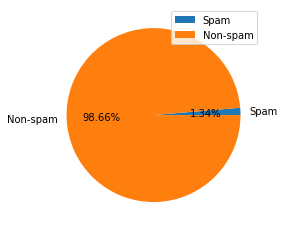

In [10]:
churn_pie  = [1363, 100000]
plt.pie(churn_pie, labels= ['Spam', 'Non-spam'], autopct="%1.2f%%")
plt.legend()

The spam rate is 1.34%, which means we have an extremely imbalanced dataset.

### 2.3 Numeric columns and target variable  

In [11]:
data_all.corr()['label'].sort_values(ascending = False)

label                        1.000000
other_waisheng_ratio         0.238678
call_300s_interval_ratio     0.186584
waisheng_cnt                 0.153003
id_user_cnt                  0.115111
call_60s_interval_ratio      0.106447
single_phone_flag            0.098801
waisheng_id_iccid            0.065718
tousu_flag                   0.046304
call_300s_times_ratio        0.031955
rizuka_flag                  0.021938
sex_12_ratio                 0.015613
call_300s_times_ratio_lm1    0.015510
night_call_num_lm3           0.014528
call_300s_times_ratio_lm2    0.009887
call_500s_times_ratio_lm1    0.009604
call_500s_times_ratio        0.009008
main_ratio_lm2               0.006522
call_500s_times_ratio_lm2    0.003527
call_gongzhong_flag_lm1      0.003180
call_gongzhong_flag_lm2      0.002178
call_gongzhong_flag_lm3      0.000406
night_lac_cnt_lm2           -0.000170
call_gongzhong_flag         -0.000687
sms_num                     -0.002579
main_prod_fee_lm3           -0.002579
xieru_flag  

Compared to other columns, other_waisheng_ratio, waisheng_cnt, call_300s_interval_ratio,id_user_cnt,age,join_months, act_voice_days_lm3, call_huibo_ratio, act_voice_days_lm1, act_voice_days, guanting_bcyc_id have high correlation with the target variable. 

### 2.4 Catogorcial columns and target variable 

Here we will focus on star_level, period and chnl_kind_code as other columns may practically make on sense or technically be unfeasible. 

chnl_kind_code
0    0.003762
1    0.020768
2    0.004599
Z    0.006210
Name: label, dtype: float64

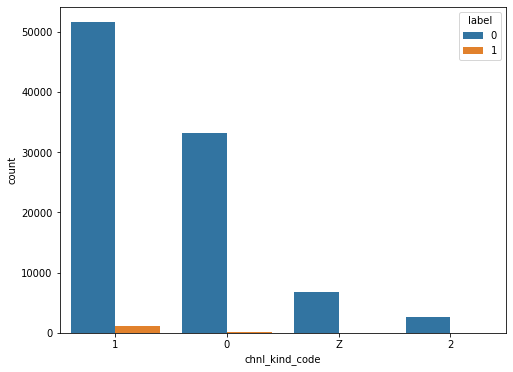

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='chnl_kind_code',hue='label',data=data_all,ax=ax)
data_all.groupby('chnl_kind_code')['label'].mean()

period
period1    0.002847
period2    0.006187
period3    0.016260
period4    0.009737
Name: label, dtype: float64

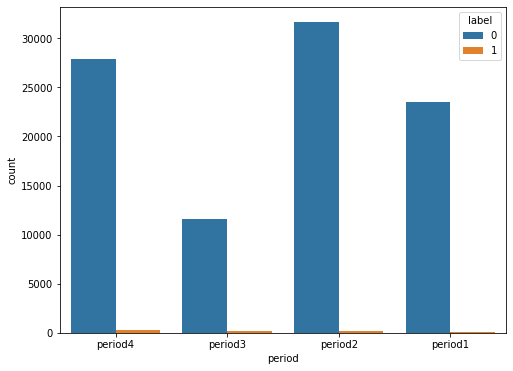

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='period',hue='label',data=data_all,ax=ax)
data_all.groupby('period')['label'].mean()

star_level
Z       0.269380
一星      0.003200
三星      0.005940
二星      0.004603
五星普通    0.010965
五星金     0.013605
五星钻     0.500000
准星      0.007581
四星      0.007123
未评级     0.023256
Name: label, dtype: float64

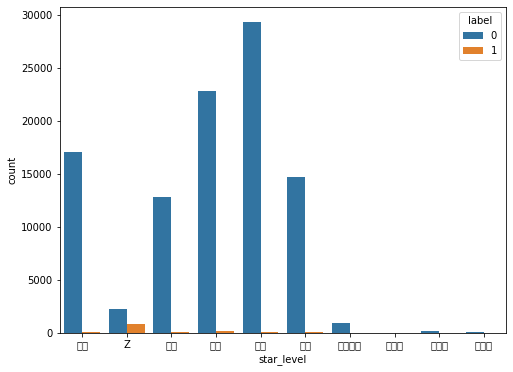

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='star_level',hue='label',data=data_all,ax=ax)
data_all.groupby('star_level')['label'].mean()

In [15]:
data_all['star_level'] = data_all['star_level'].apply(lambda x: 1 if x is 'Z' else 0)

1.star_level: the spam rate is significantly different between 'Z' and others

2.period: the spam rate is different among four different values

3.chnl_kind_code is significantly different between '1' and other values

## 3. Data proprecessing 

### 3.1 Missing values 

In [16]:
# Perecentage of missing values for each column.
percent_missing = 100*data_all.isnull().sum()/len(data_all)
missing_value = pd.DataFrame({'percent_missing': percent_missing})
missing_value.sort_values('percent_missing', inplace=True)
missing_value

,percent_missing
stat_date,0.000000
open_date,0.000000
dura_ratio_lm2,0.000000
dura_ratio_lm1,0.000000
open_act_flag,0.000000
act_voice_days,0.000000
xieru_flag,0.000000
tousu_flag,0.000000
waisheng_id_iccid,0.000000
rizuka_flag,0.000000


1.Drop the columns: sms_num and sms_act_days where the ratios of missing values are too high(63%).

2.Repacing missing values with means: columns with 10% -30% of missing values (With normal Distribution)

3.Filling in missing values with next value, i.e. backward fill: columns with less 10% of missing values

4.Filling in missing values with modes: columns with 10% -30% of missing values (Without normal distribution)

In [17]:
data_all.drop(columns=['sms_num', 'sms_act_days'], inplace=True)

In [18]:
# Columns with 10% -30% of missing values
missing_10_30 = data_all[['beijiao_call_interval', 'sex_11_ratio', 'sex_12_ratio', 'other_number_age_avg', 'other_number_agevar_pop', 'call_60s_interval_ratio', 'call_300s_interval_times', 'call_60s_interval_times', 'zhujiao_call_interval', 'call_300s_interval_ratio', 'lac_cell_cnt']]
missing_10_30.head()

,beijiao_call_interval,sex_11_ratio,sex_12_ratio,other_number_age_avg,other_number_agevar_pop,call_60s_interval_ratio,call_300s_interval_times,call_60s_interval_times,zhujiao_call_interval,call_300s_interval_ratio,lac_cell_cnt
0,20883.0,100.0,0.0,43.0,20.25,0.0,0.0,0.0,6655.0,0.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,60.0,5.0,3.0,190.0,100.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2375.0,100.0,0.0,30.0,0.50,58.0,99.0,62.0,1490.0,93.0,3.0


In [19]:
missing_10_30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101363 entries, 0 to 101362
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   beijiao_call_interval     90233 non-null  float64
 1   sex_11_ratio              88385 non-null  float64
 2   sex_12_ratio              88385 non-null  float64
 3   other_number_age_avg      88385 non-null  float64
 4   other_number_agevar_pop   88385 non-null  float64
 5   call_60s_interval_ratio   85153 non-null  float64
 6   call_300s_interval_times  85153 non-null  float64
 7   call_60s_interval_times   85153 non-null  float64
 8   zhujiao_call_interval     85153 non-null  float64
 9   call_300s_interval_ratio  85153 non-null  float64
 10  lac_cell_cnt              74763 non-null  float64
dtypes: float64(11)
memory usage: 8.5 MB


In [20]:
#Check Normal Distribution
# We use a scipy package to check if the data of a column is normally distributed. 
# If p-value is less than 0.05, no normal distribution is detected.

In [21]:
def check_norm(data_column):
    data_column_tempo = data_column[~data_column.isnull()]
    d, p = kstest(data_column_tempo, 'norm')
    print("Statistics", d, "p-value", p)
    if p < 0.05:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

In [22]:
for i in missing_10_30.columns:
    print([i])
    check_norm(missing_10_30[i])
    print('-' * 40)

['beijiao_call_interval']
Statistics 0.9993236857310376 p-value 0.0
The null hypothesis can be rejected
----------------------------------------
['sex_11_ratio']
Statistics 0.946963764318991 p-value 0.0
The null hypothesis can be rejected
----------------------------------------
['sex_12_ratio']
Statistics 0.8675914444077903 p-value 0.0
The null hypothesis can be rejected
----------------------------------------
['other_number_age_avg']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected
----------------------------------------
['other_number_agevar_pop']
Statistics 0.8841708330468908 p-value 0.0
The null hypothesis can be rejected
----------------------------------------
['call_60s_interval_ratio']
Statistics 0.7639549062618182 p-value 0.0
The null hypothesis can be rejected
----------------------------------------
['call_300s_interval_times']
Statistics 0.7162373376653399 p-value 0.0
The null hypothesis can be rejected
----------------------------------------
['call_60s_in

In [23]:
#We use visualisation to have a look at the distribution of the columns.

Text(0.5, 0.98, 'Histogram Plots for columns with 10% -30% of missing values')

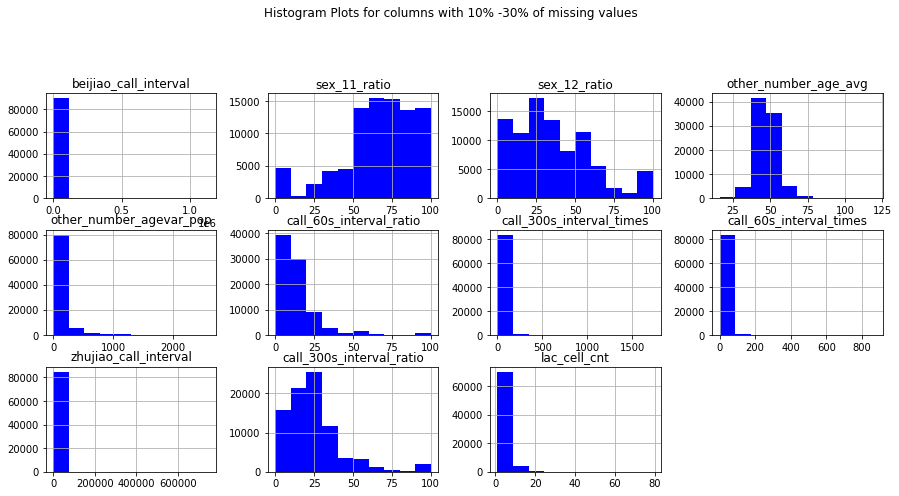

In [24]:
missing_10_30.hist(layout=(5,4), color='blue', figsize=(15, 12), grid = True)
plt.suptitle("Histogram Plots for columns with 10% -30% of missing values")

<AxesSubplot:xlabel='other_number_age_avg', ylabel='Count'>

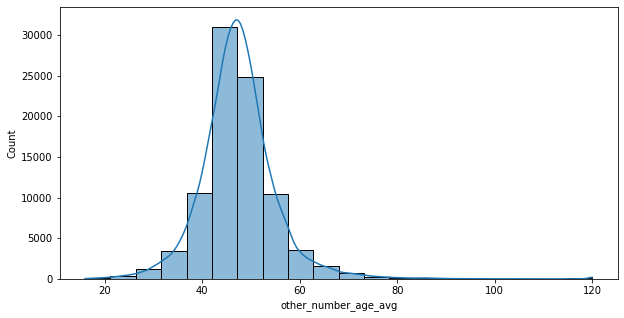

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(x = data_all['other_number_age_avg'],ax=ax,kde=True,bins=20)

The column 'other_number_age_avg' can be treated as normal distribution

In [26]:
# 10% - 30% missing values
# For the column 'other_number_age_avg', replace the missing values with mean
data_all['other_number_age_avg'] = data_all['other_number_age_avg'].fillna(data_all['other_number_age_avg'].mean())

# For other columns, replace the missing values with the mode value
mode_fill = ['beijiao_call_interval', 'sex_11_ratio', 'sex_12_ratio', 'other_number_agevar_pop', 'call_60s_interval_ratio', 'call_300s_interval_times', 'call_60s_interval_times', 'zhujiao_call_interval', 'call_300s_interval_ratio', 'lac_cell_cnt']
data_all[mode_fill] = data_all[mode_fill].fillna(data_all.mode().iloc[0])

In [27]:
# Below 10% missing values
# Fill the missing values with next value
data_all.fillna(method='backfill', inplace=True)

In [28]:
data_all.isnull().sum()

stat_date                    0
user_id                      0
serial_number                0
guanting_date                0
guanting_bcyc_id             0
join_months                  0
sex_code                     0
age                          0
single_phone_flag            0
term_merge_flag              0
star_level                   0
ronghe_flag                  0
chnl_id                      0
eparchy_code                 0
id_user_cnt                  0
imei_user_cnt                0
rizuka_flag                  0
maker                        0
version                      0
waisheng_id_iccid            0
tousu_flag                   0
xieru_flag                   0
lac_cell_cnt                 0
day_lac_cnt_lm1              0
night_lac_cnt_lm1            0
day_lac_cnt_lm2              0
night_lac_cnt_lm2            0
act_voice_days_lm1           0
act_voice_days_lm2           0
act_voice_days_lm3           0
act_voice_days               0
day_call_num_lm1             0
day_call

### 3.2 Outliers  

1. We define the values that are 3 standard deviations greater or less than the mean as outliers.
2. We replace those outliers with mean +/- (3 standard deviations + 1) to avoid loss of data.

In [29]:
data_all.head()

,stat_date,user_id,serial_number,guanting_date,guanting_bcyc_id,join_months,sex_code,age,single_phone_flag,term_merge_flag,star_level,ronghe_flag,chnl_id,eparchy_code,id_user_cnt,imei_user_cnt,rizuka_flag,maker,version,waisheng_id_iccid,tousu_flag,xieru_flag,lac_cell_cnt,day_lac_cnt_lm1,night_lac_cnt_lm1,day_lac_cnt_lm2,night_lac_cnt_lm2,act_voice_days_lm1,act_voice_days_lm2,act_voice_days_lm3,act_voice_days,day_call_num_lm1,day_call_num_lm2,day_call_num_lm3,day_call_num,night_call_num_lm1,night_call_num_lm2,night_call_num_lm3,night_call_num,call_dura_lm1,call_dura_lm2,call_dura_lm3,call_dura,call_num_lm1,call_num_lm2,call_num_lm3,call_num,other_cnt_lm1,other_cnt_lm2,other_cnt_lm3,other_cnt,calling_num_lm1,calling_num_lm2,calling_num_lm3,calling_num,calling_other_cnt_lm1,calling_other_cnt_lm2,calling_other_cnt_lm3,calling_other_cnt,call_gongzhong_flag_lm1,call_gongzhong_flag_lm2,call_gongzhong_flag_lm3,call_gongzhong_flag,call_60s_interval_times,call_300s_interval_times,call_60s_interval_ratio,call_300s_interval_ratio,call_45s_times_lm1,call_300s_times_lm1,call_500s_times_lm1,call_45s_times_lm2,call_300s_times_lm2,call_500s_times_lm2,call_45s_times,call_300s_times,call_500s_times,call_45s_times_ratio_lm1,call_300s_times_ratio_lm1,call_500s_times_ratio_lm1,call_45s_times_ratio_lm2,call_300s_times_ratio_lm2,call_500s_times_ratio_lm2,call_45s_times_ratio,call_300s_times_ratio,call_500s_times_ratio,call_1day_huibo_times,call_huibo_times,call_1day_huibo_ratio,call_huibo_ratio,zhujiao_call_interval,beijiao_call_interval,period,other_number_age_avg,other_number_agevar_pop,sex_11_ratio,sex_12_ratio,other_waisheng_ratio,waisheng_cnt,open_act_flag,main_prd_flow,main_feeset_dura,main_prod_fee_lm1,main_prod_fee_lm2,main_prod_fee_lm3,total_fee_lm1,total_fee_lm2,total_fee_lm3,main_ratio_lm1,main_ratio_lm2,dura_ratio_lm1,dura_ratio_lm2,open_date,chnl_kind_code,label
0,2020-03-03,20310031247431,10000,2020-03-03,202003,25.0,11.0,47.0,0.0,0.0,0,0,120001304.0,120000000.0,2.0,3.0,1,Z,Z,0,0,0,1.0,1.0,0.0,19.0,9.0,20.0,1.0,10.0,4,1.0,33.0,1.0,10.0,0.0,12.0,0.0,0.0,7.0,2250.0,32.0,294.0,1.0,45.0,1.0,10.0,1.0,18.0,1.0,4.0,1.0,28.0,1.0,5.0,1.0,16.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,33.0,2.0,0.0,8.0,0.0,0.0,100.0000,0.0,0.0,73.3333,4.4444,0.0,80.0000,0.0000,0.0000,1.0,1.0,25.0,25.0,6655.0,20883.0,period4,43.000000,20.25,100.0,0.0,0.0000,0.0,1,20480.0,30.0,18.0,18.0,18.0,0.0,12.0,0.0,1.0,15.0,3.33,3.33,2018-03-19,1,1
1,2020-03-31,12310015331327,10000,2020-03-31,202003,5.0,11.0,22.0,0.0,0.0,1,0,112054371.0,112000000.0,3.0,3.0,0,华为,EML-TL00,1,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,2.0,50.0,32.0,1544.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,100.0000,0.0,0.0,0.0000,0.0000,0.0,42.8571,28.5714,14.2857,0.0,0.0,0.0,0.0,0.0,0.0,period3,47.448176,0.00,100.0,0.0,83.3333,4.0,1,6236.0,100.0,18.0,18.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2019-11-02,1,1
2,2020-03-09,11310042606883,10000,2020-03-09,202003,2.0,11.0,23.0,1.0,0.0,1,0,111057001.0,111000000.0,5.0,1.0,0,欧珀,PBAM00,0,0,0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,2,1.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,2.0,50.0,32.0,1544.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,3.0,5.0,60.0,100.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,100.0000,0.0,0.0,0.0000,0.0000,0.0,42.8571,28.5714,14.2857,0.0,0.0,0.0,0.0,190.0,0.0,period3,47.448176,0.00,100.0,0.0,83.3333,4.0,1,6236.0,100.0,18.0,8.0,18.0,0.4,0.4,0.4,0.0,0.0,1.00,0.00,2020-02-25,1,1
3,2020-03-03,18310019160231,10000,2020-03-03,202003,3.0,11.0,23.0,0.0,0.0,1,0,118058857.0,118000000.0,3.0,3.0,0,苹果,iPhone 7 A1660,0,0,0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,1.0,0,113.0,1.0,1.0,113.0,0.0,0.0,0.0,0.0,3286.0,50.0,32.0,3286.0,113.0,1.0,1.0,113.0,111.0,1.0,1.0,111.0,108.0,1.0,1.0,108.0,106.0,1.0,1.0,106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,0.0,85.8407,0.0,0.0,0.0000,0.0000,0.0,85.8407,0.0000,0.0000,0.0,0

In [30]:
object_column = data_all[['stat_date', 'guanting_date', 'star_level', 'chnl_id', 'maker', 'version', 'period', 'open_date', 'chnl_kind_code']]
non_object_column = data_all[data_all.columns.difference(['stat_date', 'guanting_date', 'star_level', 'chnl_id', 'maker', 'version', 'period', 'open_date', 'chnl_kind_code'])]
non_object_column.head()

,act_voice_days,act_voice_days_lm1,act_voice_days_lm2,act_voice_days_lm3,age,beijiao_call_interval,call_1day_huibo_ratio,call_1day_huibo_times,call_300s_interval_ratio,call_300s_interval_times,call_300s_times,call_300s_times_lm1,call_300s_times_lm2,call_300s_times_ratio,call_300s_times_ratio_lm1,call_300s_times_ratio_lm2,call_45s_times,call_45s_times_lm1,call_45s_times_lm2,call_45s_times_ratio,call_45s_times_ratio_lm1,call_45s_times_ratio_lm2,call_500s_times,call_500s_times_lm1,call_500s_times_lm2,call_500s_times_ratio,call_500s_times_ratio_lm1,call_500s_times_ratio_lm2,call_60s_interval_ratio,call_60s_interval_times,call_dura,call_dura_lm1,call_dura_lm2,call_dura_lm3,call_gongzhong_flag,call_gongzhong_flag_lm1,call_gongzhong_flag_lm2,call_gongzhong_flag_lm3,call_huibo_ratio,call_huibo_times,call_num,call_num_lm1,call_num_lm2,call_num_lm3,calling_num,calling_num_lm1,calling_num_lm2,calling_num_lm3,calling_other_cnt,calling_other_cnt_lm1,calling_other_cnt_lm2,calling_other_cnt_lm3,day_call_num,day_call_num_lm1,day_call_num_lm2,day_call_num_lm3,day_lac_cnt_lm1,day_lac_cnt_lm2,dura_ratio_lm1,dura_ratio_lm2,eparchy_code,guanting_bcyc_id,id_user_cnt,imei_user_cnt,join_months,label,lac_cell_cnt,main_feeset_dura,main_prd_flow,main_prod_fee_lm1,main_prod_fee_lm2,main_prod_fee_lm3,main_ratio_lm1,main_ratio_lm2,night_call_num,night_call_num_lm1,night_call_num_lm2,night_call_num_lm3,night_lac_cnt_lm1,night_lac_cnt_lm2,open_act_flag,other_cnt,other_cnt_lm1,other_cnt_lm2,other_cnt_lm3,other_number_age_avg,other_number_agevar_pop,other_waisheng_ratio,rizuka_flag,ronghe_flag,serial_number,sex_11_ratio,sex_12_ratio,sex_code,single_phone_flag,term_merge_flag,total_fee_lm1,total_fee_lm2,total_fee_lm3,tousu_flag,user_id,waisheng_cnt,waisheng_id_iccid,xieru_flag,zhujiao_call_interval
0,4,20.0,1.0,10.0,47.0,20883.0,25.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0000,0.0,4.4444,8.0,1.0,33.0,80.0000,100.0000,73.3333,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,294.0,7.0,2250.0,32.0,0.0,0.0,0.0,0.0,25.0,1.0,10.0,1.0,45.0,1.0,5.0,1.0,28.0,1.0,4.0,1.0,16.0,1.0,10.0,1.0,33.0,1.0,1.0,19.0,3.33,3.33,120000000.0,202003,2.0,3.0,25.0,1,1.0,30.0,20480.0,18.0,18.0,18.0,1.0,15.0,0.0,0.0,12.0,0.0,0.0,9.0,1,4.0,1.0,18.0,1.0,43.000000,20.25,0.0000,1,0,10000,100.0,0.0,11.0,0.0,0.0,0.0,12.0,0.0,0,20310031247431,0.0,0,0,6655.0
1,0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,28.5714,0.0,0.0000,3.0,1.0,0.0,42.8571,100.0000,0.0000,1.0,0.0,0.0,14.2857,0.0,0.0,0.0,0.0,1544.0,2.0,50.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,0.00,0.00,112000000.0,202003,3.0,3.0,5.0,1,1.0,100.0,6236.0,18.0,18.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6.0,1.0,1.0,1.0,47.448176,0.00,83.3333,0,0,10000,100.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0,12310015331327,4.0,1,0,0.0
2,2,1.0,1.0,1.0,23.0,0.0,0.0,0.0,100.0,5.0,2.0,0.0,0.0,28.5714,0.0,0.0000,3.0,1.0,0.0,42.8571,100.0000,0.0000,1.0,0.0,0.0,14.2857,0.0,0.0,60.0,3.0,1544.0,2.0,50.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,1.00,0.00,111000000.0,202003,5.0,1.0,2.0,1,1.0,100.0,6236.0,18.0,8.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6.0,1.0,1.0,1.0,47.448176,0.00,83.3333,0,0,10000,100.0,0.0,11.0,1.0,0.0,0.4,0.4,0.4,0,11310042606883,4.0,0,0,190.0
3,0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,97.0,97.0,0.0,85.8407,85.8407,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,3286.0,3286.0,50.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,113.0,1.0,1.0,108.0,108.0,1.0,1.0,106.0,106.0,1.0,1.0,113.0,113.0,1.0,1.0,11.0,1.0,0.00,0.00,118000000.0,202003,3.0,3.0,3.0,1,1.0,30.0,0.0,8.0,8.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,111.0,111.0,1.0,1.0,47.448176,0.00,95.2830,0,0,10000,100.0,0.0,11.0,0.0,0.0,0.0,0.4,0.4,0,18310019160231,25.0,0,0,0.0
4,2,0.0,2.0,0.0,63.0,2375.0,0.0,0.0,93.0,99.0,0.0,0.0,1.0,0.0000,0.0,1.4493,97.0,97.0,43.0,85.8407,85.8407,62.3188,0.0,0.0,0.0,0.0000,0.0,0.0,58.0,62.0,3286.0,3286.0,3883.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,113.0,69.0,1.0,108.

In [31]:
non_object_column.describe()

,act_voice_days,act_voice_days_lm1,act_voice_days_lm2,act_voice_days_lm3,age,beijiao_call_interval,call_1day_huibo_ratio,call_1day_huibo_times,call_300s_interval_ratio,call_300s_interval_times,call_300s_times,call_300s_times_lm1,call_300s_times_lm2,call_300s_times_ratio,call_300s_times_ratio_lm1,call_300s_times_ratio_lm2,call_45s_times,call_45s_times_lm1,call_45s_times_lm2,call_45s_times_ratio,call_45s_times_ratio_lm1,call_45s_times_ratio_lm2,call_500s_times,call_500s_times_lm1,call_500s_times_lm2,call_500s_times_ratio,call_500s_times_ratio_lm1,call_500s_times_ratio_lm2,call_60s_interval_ratio,call_60s_interval_times,call_dura,call_dura_lm1,call_dura_lm2,call_dura_lm3,call_gongzhong_flag,call_gongzhong_flag_lm1,call_gongzhong_flag_lm2,call_gongzhong_flag_lm3,call_huibo_ratio,call_huibo_times,call_num,call_num_lm1,call_num_lm2,call_num_lm3,calling_num,calling_num_lm1,calling_num_lm2,calling_num_lm3,calling_other_cnt,calling_other_cnt_lm1,calling_other_cnt_lm2,calling_other_cnt_lm3,day_call_num,day_call_num_lm1,day_call_num_lm2,day_call_num_lm3,day_lac_cnt_lm1,day_lac_cnt_lm2,dura_ratio_lm1,dura_ratio_lm2,eparchy_code,guanting_bcyc_id,id_user_cnt,imei_user_cnt,join_months,label,lac_cell_cnt,main_feeset_dura,main_prd_flow,main_prod_fee_lm1,main_prod_fee_lm2,main_prod_fee_lm3,main_ratio_lm1,main_ratio_lm2,night_call_num,night_call_num_lm1,night_call_num_lm2,night_call_num_lm3,night_lac_cnt_lm1,night_lac_cnt_lm2,open_act_flag,other_cnt,other_cnt_lm1,other_cnt_lm2,other_cnt_lm3,other_number_age_avg,other_number_agevar_pop,other_waisheng_ratio,rizuka_flag,ronghe_flag,serial_number,sex_11_ratio,sex_12_ratio,sex_code,single_phone_flag,term_merge_flag,total_fee_lm1,total_fee_lm2,total_fee_lm3,tousu_flag,user_id,waisheng_cnt,waisheng_id_iccid,xieru_flag,zhujiao_call_interval
count,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,1.013630e+05,101363.00000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.00000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,1.013630e+05,101363.000000,101363.000000,1.013630e+05,101363.000000,101363.000000,101363.000000,101363.000000,1.013630e+05,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.0,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,1.013630e+05,101363.000000,101363.000000,101363.000000,101363.000000
mean,21.287965,21.337234,16.873188,22.066277,48.163304,2.995525e+04,24.94244,5.917840,19.882945,15.190247,6.622190,7.157562,7.281750,5.539542,5.609307,5.766834,89.571362,94.635972,92.040912,57.582493,57.150691,56.785992,3.105680,3.341920,3.398824,2.880922,2.933688,3.016674,10.733877,7.718290,12318.718428,13263.176494,13280.917968,12378.988576,0.003650,0.00368,0.003601,0.003433,42.430779,9.504898,156.562000,166.940698,163.951846,147.050798,72.857305,80.894103,79.191046,71.335517,21.582540,22.493809,22.054764,20.863856,129.028255,137.528497,138.004597,127.645374,35.629086,34.928504,90.280494,91.344805,1.178550e+08,202005.129613,1.810227,1.553632e+03,140.569508,0.013447,2.688111,171.395124,2.084014e+05,50.163462,50.135809,50.004074,24

As we can see from above table, most of the numeric columns have outliers.

Text(0.5, 0.98, 'Histogram Plots for non-object columns')

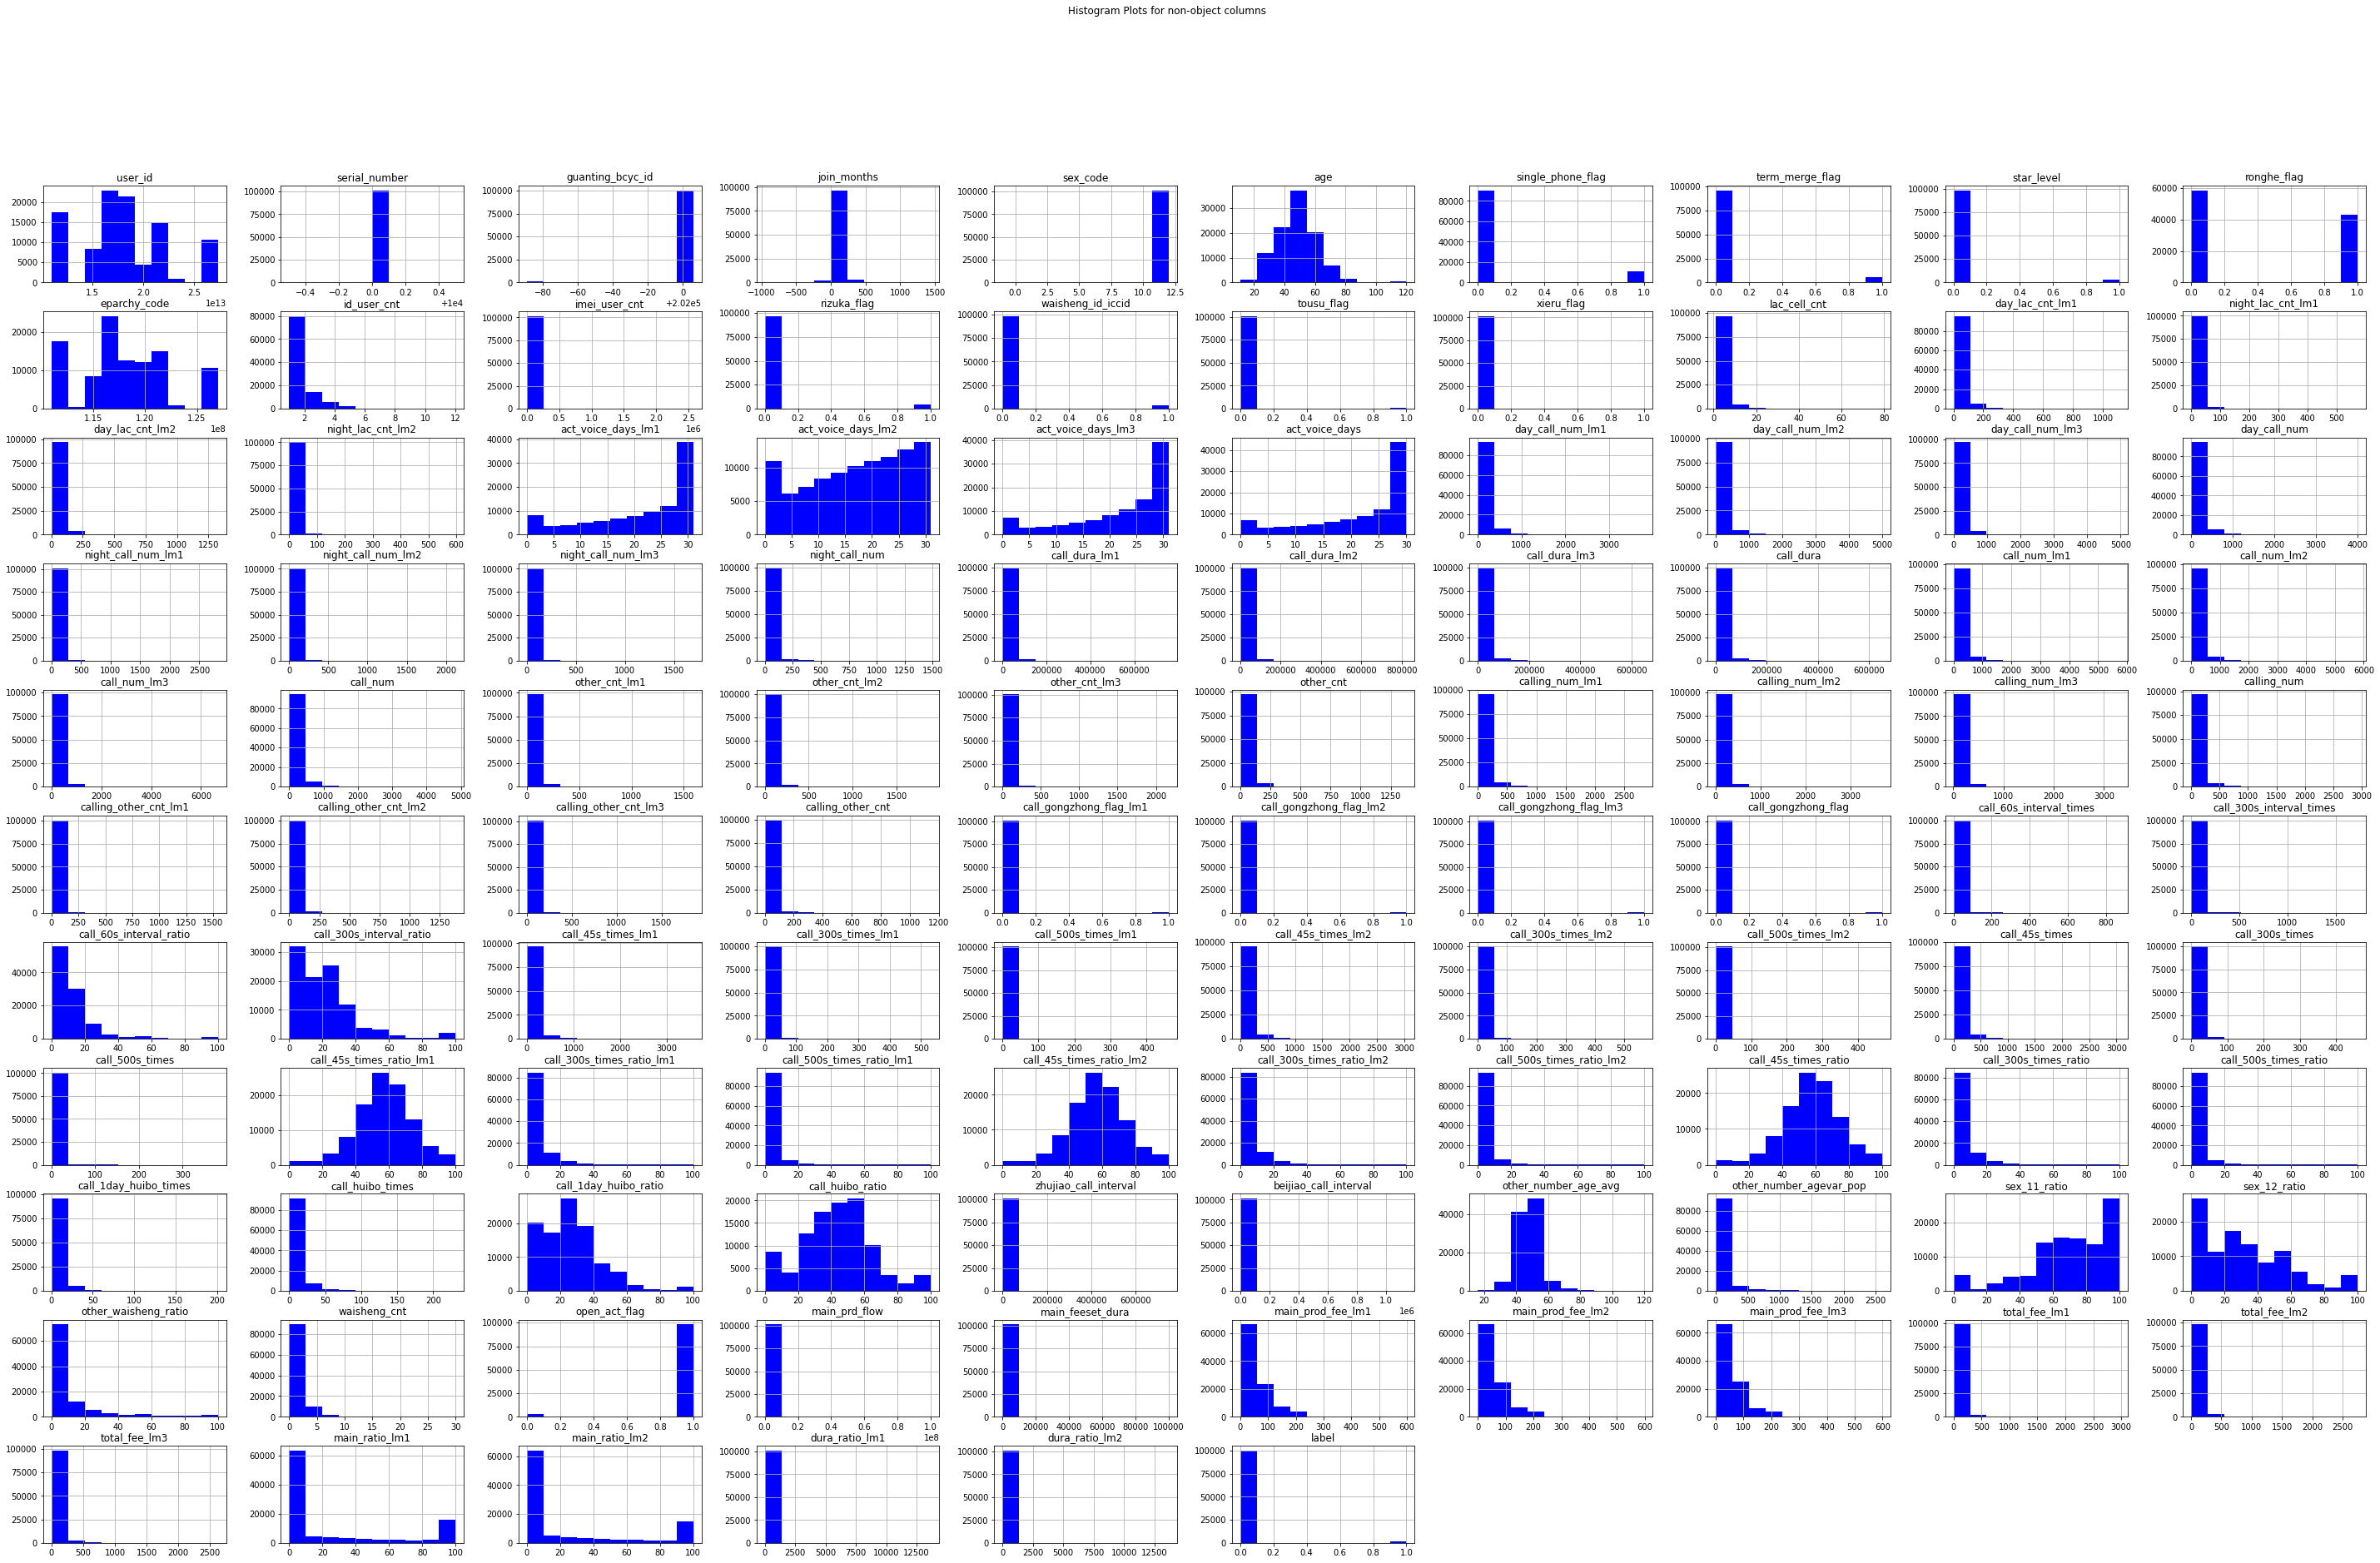

In [32]:
data_all.hist(color='blue', figsize=(50, 30), grid = True)
plt.suptitle("Histogram Plots for non-object columns")

In [33]:
def outlier_clean(data_column):
    data_column_tempo = data_column.copy()
    data_column_label = data_column.copy()
    u = data_column.mean()
    std = data_column.std()
    column_list = abs(data_column-u)>3*std
    data_column_tempo[column_list] = u +  (data_column_tempo[column_list] - u) / abs(data_column_tempo[column_list] - u) * (3*std+1)
    # data_column_label[column_list] = 1
    # data_column_label[~column_list] = 0

    return data_column_tempo[column_list].any(), data_column_tempo

In [34]:
name_list = list(data_all)
name_exclude = ['label','sex_code','stat_date', 'user_id', 'guanting_date', 'guanting_bcyc_id', 'open_date', 'serial_number']
data_final = data_all.copy()

for name in name_list:
    print(name)
    data_column = data_all[name]
    if name in name_exclude:
        continue
    if (data_column.dtypes != "int64" and data_column.dtypes != "float64"):
        continue
        
    check, column_value = outlier_clean(data_column)
    if(not check):
        continue
    data_final[name] = column_value

stat_date
user_id
serial_number
guanting_date
guanting_bcyc_id
join_months
sex_code
age
single_phone_flag
term_merge_flag
star_level
ronghe_flag
chnl_id
eparchy_code
id_user_cnt
imei_user_cnt
rizuka_flag
maker
version
waisheng_id_iccid
tousu_flag
xieru_flag
lac_cell_cnt
day_lac_cnt_lm1
night_lac_cnt_lm1
day_lac_cnt_lm2
night_lac_cnt_lm2
act_voice_days_lm1
act_voice_days_lm2
act_voice_days_lm3
act_voice_days
day_call_num_lm1
day_call_num_lm2
day_call_num_lm3
day_call_num
night_call_num_lm1
night_call_num_lm2
night_call_num_lm3
night_call_num
call_dura_lm1
call_dura_lm2
call_dura_lm3
call_dura
call_num_lm1
call_num_lm2
call_num_lm3
call_num
other_cnt_lm1
other_cnt_lm2
other_cnt_lm3
other_cnt
calling_num_lm1
calling_num_lm2
calling_num_lm3
calling_num
calling_other_cnt_lm1
calling_other_cnt_lm2
calling_other_cnt_lm3
calling_other_cnt
call_gongzhong_flag_lm1
call_gongzhong_flag_lm2
call_gongzhong_flag_lm3
call_gongzhong_flag
call_60s_interval_times
call_300s_interval_times
call_60s_interva

In [35]:
data_final.head(5)

,stat_date,user_id,serial_number,guanting_date,guanting_bcyc_id,join_months,sex_code,age,single_phone_flag,term_merge_flag,star_level,ronghe_flag,chnl_id,eparchy_code,id_user_cnt,imei_user_cnt,rizuka_flag,maker,version,waisheng_id_iccid,tousu_flag,xieru_flag,lac_cell_cnt,day_lac_cnt_lm1,night_lac_cnt_lm1,day_lac_cnt_lm2,night_lac_cnt_lm2,act_voice_days_lm1,act_voice_days_lm2,act_voice_days_lm3,act_voice_days,day_call_num_lm1,day_call_num_lm2,day_call_num_lm3,day_call_num,night_call_num_lm1,night_call_num_lm2,night_call_num_lm3,night_call_num,call_dura_lm1,call_dura_lm2,call_dura_lm3,call_dura,call_num_lm1,call_num_lm2,call_num_lm3,call_num,other_cnt_lm1,other_cnt_lm2,other_cnt_lm3,other_cnt,calling_num_lm1,calling_num_lm2,calling_num_lm3,calling_num,calling_other_cnt_lm1,calling_other_cnt_lm2,calling_other_cnt_lm3,calling_other_cnt,call_gongzhong_flag_lm1,call_gongzhong_flag_lm2,call_gongzhong_flag_lm3,call_gongzhong_flag,call_60s_interval_times,call_300s_interval_times,call_60s_interval_ratio,call_300s_interval_ratio,call_45s_times_lm1,call_300s_times_lm1,call_500s_times_lm1,call_45s_times_lm2,call_300s_times_lm2,call_500s_times_lm2,call_45s_times,call_300s_times,call_500s_times,call_45s_times_ratio_lm1,call_300s_times_ratio_lm1,call_500s_times_ratio_lm1,call_45s_times_ratio_lm2,call_300s_times_ratio_lm2,call_500s_times_ratio_lm2,call_45s_times_ratio,call_300s_times_ratio,call_500s_times_ratio,call_1day_huibo_times,call_huibo_times,call_1day_huibo_ratio,call_huibo_ratio,zhujiao_call_interval,beijiao_call_interval,period,other_number_age_avg,other_number_agevar_pop,sex_11_ratio,sex_12_ratio,other_waisheng_ratio,waisheng_cnt,open_act_flag,main_prd_flow,main_feeset_dura,main_prod_fee_lm1,main_prod_fee_lm2,main_prod_fee_lm3,total_fee_lm1,total_fee_lm2,total_fee_lm3,main_ratio_lm1,main_ratio_lm2,dura_ratio_lm1,dura_ratio_lm2,open_date,chnl_kind_code,label
0,2020-03-03,20310031247431,10000,2020-03-03,202003,25.0,11.0,47.0,0.0,0.0,0.00000,0,120001304.0,120000000.0,2.000000,3.0,1.676992,Z,Z,0.000000,0.0,0.0,1.0,1.0,0.0,19.0,9.0,20.0,1.0,10.0,4,1.0,33.0,1.0,10.0,0.0,12.0,0.0,0.0,7.0,2250.0,32.0,294.0,1.0,45.0,1.0,10.0,1.0,18.0,1.0,4.0,1.0,28.0,1.0,5.0,1.0,16.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,1.0,0.0,0.0,33.0,2.0,0.0,8.0,0.0,0.0,100.0000,0.0,0.0,73.333300,4.4444,0.0,80.0000,0.0000,0.0000,1.0,1.0,25.0,25.0,6655.0,20883.0,period4,43.000000,20.25,100.0,0.0,0.000000,0.000000,1.0,20480.0,30.0,18.0,18.0,18.0,0.0,12.0,0.0,1.0,15.0,3.33,3.33,2018-03-19,1,1
1,2020-03-31,12310015331327,10000,2020-03-31,202003,5.0,11.0,22.0,0.0,0.0,1.54678,0,112054371.0,112000000.0,3.000000,3.0,0.000000,华为,EML-TL00,1.560922,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,2.0,50.0,32.0,1544.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,100.0000,0.0,0.0,4.484194,0.0000,0.0,42.8571,28.5714,14.2857,0.0,0.0,0.0,0.0,0.0,0.0,period3,47.448176,0.00,100.0,0.0,67.509497,4.000000,1.0,6236.0,100.0,18.0,18.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2019-11-02,1,1
2,2020-03-09,11310042606883,10000,2020-03-09,202003,2.0,11.0,23.0,1.0,0.0,1.54678,0,111057001.0,111000000.0,5.803019,1.0,0.000000,欧珀,PBAM00,0.000000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,2,1.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,2.0,50.0,32.0,1544.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,3.0,5.0,54.561933,79.00811,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,100.0000,0.0,0.0,4.484194,0.0000,0.0,42.8571,28.5714,14.2857,0.0,0.0,0.0,0.0,190.0,0.0,period3,47.448176,0.00,100.0,0.0,67.509497,4.000000,1.0,6236.0,100.0,18.0,8.0,18.0,0.4,0.4,0.4,0.0,0.0,1.00,0.00,2020-02-25,1,1
3,2020-03-03,18310019160231,10000,2020-03-03,202003,3.0,11.0,23.0,0.0,0.0,1.54678,0,118058857.0,118000000.0,3.000000,3.0,0.000000,苹果,iPhone 7 A1660,0.000000,0.0,0.0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,1.0,0,113.0,1.0,1.0,113.0,0.0,0.0,0.0,0.0,3286.0,50.0,32.0,3286.0,113.0,1.0,1.0,113.0,111.0,1.0,1.0,11

### 3.3 Delete Invalid Rows

In [36]:
# Delete samples where open date is before 1995 as the business was satrted in 1995. 
data_all1= data_final[~(data_all['open_date'].astype(str).apply(lambda x: x.split('-')[0])=='1900')]
data_all2 = data_all1[data_all1['open_date'].astype(str).apply(lambda x: x.split('-')[0])>'1994']

# Calculate the period of use
data_all2['time_interval']=(pd.to_datetime(data_all2['stat_date'],errors='coerce')-
                            pd.to_datetime(data_all2['open_date'],errors = 'coerce')).dt.days.fillna(0)

# Delect samples where open_date is larger than stat_date
data_all3=  data_all2[data_all2['time_interval']>0]

### 3.4 Encode data

In [37]:
label_encoder = LabelEncoder()
encode_feature = ['stat_date', 'guanting_date', 'chnl_id', 'maker', 'version', 'period', 'open_date', 'chnl_kind_code']
for en_feat in encode_feature:
    data_all3[en_feat] = data_all3[en_feat].astype(str)
    data_all3[en_feat] = label_encoder.fit_transform(data_all3[en_feat])

## 4. Feature engineering

### 4.1 New Features Creation

In [38]:
# Create new variables, replace all the count features within 30 days with ratios, and then delete the original features
# New variables include call activity rate, daily average daytime calls, daily average nighttime calls, daily average calling duration, daily average calling number, daily average number of passtive numbers, and daily average number of calls
trans_feat = ['act_voice_days','day_call_num','night_call_num','call_dura','call_num','other_cnt','calling_num']
result_feat = ['act_ratio','day_call_num_ratio','night_call_num_ratio','call_dura_ratio','call_num_ratio','other_cnt_ratio','calling_num_ratio']

for feat1,feat2 in zip(trans_feat,result_feat):
    data_all3[feat2]=data_all3[feat1]/data_all3['time_interval'].map(lambda x: 30 if x>30 else x)

In [39]:
# Calculate call density (average number of calls per day in active days)
data_all3['call_focus'] = data_all3['calling_num']/data_all3['act_voice_days']

# Calculate initiative calls dispersion
data_all4= data_all3[data_all3['calling_num']>0]
data_all4['calling_disp']=data_all4['calling_other_cnt']/data_all4['calling_num']

# Calculate the proportion of initiative calls in the past 30 days
data_all4['calling_initiative_ratio']=data_all4['calling_num']/data_all4['call_num']

In [40]:
drop_feat1 = ['act_voice_days','day_call_num','night_call_num','call_dura','call_num','other_cnt','calling_num',
              'calling_other_cnt']

data_all5= data_all4.drop(drop_feat1,axis=1)

In [41]:
data_all5.head()

,stat_date,user_id,serial_number,guanting_date,guanting_bcyc_id,join_months,sex_code,age,single_phone_flag,term_merge_flag,star_level,ronghe_flag,chnl_id,eparchy_code,id_user_cnt,imei_user_cnt,rizuka_flag,maker,version,waisheng_id_iccid,tousu_flag,xieru_flag,lac_cell_cnt,day_lac_cnt_lm1,night_lac_cnt_lm1,day_lac_cnt_lm2,night_lac_cnt_lm2,act_voice_days_lm1,act_voice_days_lm2,act_voice_days_lm3,day_call_num_lm1,day_call_num_lm2,day_call_num_lm3,night_call_num_lm1,night_call_num_lm2,night_call_num_lm3,call_dura_lm1,call_dura_lm2,call_dura_lm3,call_num_lm1,call_num_lm2,call_num_lm3,other_cnt_lm1,other_cnt_lm2,other_cnt_lm3,calling_num_lm1,calling_num_lm2,calling_num_lm3,calling_other_cnt_lm1,calling_other_cnt_lm2,calling_other_cnt_lm3,call_gongzhong_flag_lm1,call_gongzhong_flag_lm2,call_gongzhong_flag_lm3,call_gongzhong_flag,call_60s_interval_times,call_300s_interval_times,call_60s_interval_ratio,call_300s_interval_ratio,call_45s_times_lm1,call_300s_times_lm1,call_500s_times_lm1,call_45s_times_lm2,call_300s_times_lm2,call_500s_times_lm2,call_45s_times,call_300s_times,call_500s_times,call_45s_times_ratio_lm1,call_300s_times_ratio_lm1,call_500s_times_ratio_lm1,call_45s_times_ratio_lm2,call_300s_times_ratio_lm2,call_500s_times_ratio_lm2,call_45s_times_ratio,call_300s_times_ratio,call_500s_times_ratio,call_1day_huibo_times,call_huibo_times,call_1day_huibo_ratio,call_huibo_ratio,zhujiao_call_interval,beijiao_call_interval,period,other_number_age_avg,other_number_agevar_pop,sex_11_ratio,sex_12_ratio,other_waisheng_ratio,waisheng_cnt,open_act_flag,main_prd_flow,main_feeset_dura,main_prod_fee_lm1,main_prod_fee_lm2,main_prod_fee_lm3,total_fee_lm1,total_fee_lm2,total_fee_lm3,main_ratio_lm1,main_ratio_lm2,dura_ratio_lm1,dura_ratio_lm2,open_date,chnl_kind_code,label,time_interval,act_ratio,day_call_num_ratio,night_call_num_ratio,call_dura_ratio,call_num_ratio,other_cnt_ratio,calling_num_ratio,call_focus,calling_disp,calling_initiative_ratio
0,54,20310031247431,10000,54,202003,25.0,11.0,47.0,0.0,0.0,0.00000,0,7478,120000000.0,2.000000,3.0,1.676992,12,2759,0.000000,0.0,0.0,1.0,1.0,0.0,19.0,9.0,20.0,1.0,10.0,1.0,33.0,1.0,0.0,12.0,0.0,7.0,2250.0,32.0,1.0,45.0,1.0,1.0,18.0,1.0,1.0,28.0,1.0,1.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,1.0,0.0,0.0,33.0,2.0,0.0,8.0,0.0,0.0,100.0000,0.0,0.0,73.333300,4.4444,0.0,80.0000,0.0000,0.0000,1.0,1.0,25.0,25.0,6655.0,20883.0,3,43.000000,20.25,100.0,0.0,0.000000,0.000000,1.0,20480.0,30.0,18.0,18.0,18.0,0.0,12.0,0.0,1.0,15.0,3.33,3.33,7107,1,1,715,0.133333,0.333333,0.0,9.800000,0.333333,0.133333,0.166667,1.25,0.800000,0.500000
1,81,12310015331327,10000,81,202003,5.0,11.0,22.0,0.0,0.0,1.54678,0,2678,112000000.0,3.000000,3.0,0.000000,82,698,1.560922,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,50.0,32.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,100.0000,0.0,0.0,4.484194,0.0000,0.0,42.8571,28.5714,14.2857,0.0,0.0,0.0,0.0,0.0,0.0,2,47.448176,0.00,100.0,0.0,67.509497,4.000000,1.0,6236.0,100.0,18.0,18.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,7695,1,1,150,0.000000,0.233333,0.0,51.466667,0.233333,0.200000,0.233333,inf,0.857143,1.000000
2,60,11310042606883,10000,60,202003,2.0,11.0,23.0,1.0,0.0,1.54678,0,1156,111000000.0,5.803019,1.0,0.000000,232,1944,0.000000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,50.0,32.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,5.0,54.561933,79.00811,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,100.0000,0.0,0.0,4.484194,0.0000,0.0,42.8571,28.5714,14.2857,0.0,0.0,0.0,0.0,190.0,0.0,2,47.448176,0.00,100.0,0.0,67.509497,4.000000,1.0,6236.0,100.0,18.0,8.0,18.0,0.4,0.4,0.4,0.0,0.0,1.00,0.00,7806,1,1,13,0.153846,0.538462,0.0,118.769231,0.538462,0.461538,0.538462,3.50,0.857143,1.000000
3,54,18310019160231,10000,54,202003,3.0,11.0,23.0,0.0,0.0,1.54678,0,6309,118000000.0,3.000000,3.0,0.000000,322,2866,0.000000,0.0,0.0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,1.0,113.0

In [42]:
(data_all5 < 0).sum()

stat_date                       0
user_id                         0
serial_number                   0
guanting_date                   0
guanting_bcyc_id                0
join_months                     0
sex_code                       45
age                             0
single_phone_flag               0
term_merge_flag                 0
star_level                      0
ronghe_flag                     0
chnl_id                         0
eparchy_code                    0
id_user_cnt                     0
imei_user_cnt                   0
rizuka_flag                     0
maker                           0
version                         0
waisheng_id_iccid               0
tousu_flag                      0
xieru_flag                      0
lac_cell_cnt                    0
day_lac_cnt_lm1                 0
night_lac_cnt_lm1               0
day_lac_cnt_lm2                 0
night_lac_cnt_lm2               0
act_voice_days_lm1              0
act_voice_days_lm2              0
act_voice_days

In [43]:
# Drop rows with less than 0 or infinite values.

In [44]:
data_all5[data_all5<0] = np.nan
data_all5.dropna(inplace=True)

In [45]:
data_all5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92158 entries, 0 to 101362
Columns: 117 entries, stat_date to calling_initiative_ratio
dtypes: float64(103), int32(8), int64(6)
memory usage: 80.2 MB


In [46]:
np.isinf(data_all5).values.sum()

1845

In [47]:
# Replace infinite updated data with nan
data_all5.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
data_all5.dropna(inplace=True)

In [48]:
data_all5.shape

(90313, 117)

### 4.2 Features Selection 

We use Chi-squared test and anova to decide if a feature is correlated with the target variable.

In [49]:
data_all5.head()

,stat_date,user_id,serial_number,guanting_date,guanting_bcyc_id,join_months,sex_code,age,single_phone_flag,term_merge_flag,star_level,ronghe_flag,chnl_id,eparchy_code,id_user_cnt,imei_user_cnt,rizuka_flag,maker,version,waisheng_id_iccid,tousu_flag,xieru_flag,lac_cell_cnt,day_lac_cnt_lm1,night_lac_cnt_lm1,day_lac_cnt_lm2,night_lac_cnt_lm2,act_voice_days_lm1,act_voice_days_lm2,act_voice_days_lm3,day_call_num_lm1,day_call_num_lm2,day_call_num_lm3,night_call_num_lm1,night_call_num_lm2,night_call_num_lm3,call_dura_lm1,call_dura_lm2,call_dura_lm3,call_num_lm1,call_num_lm2,call_num_lm3,other_cnt_lm1,other_cnt_lm2,other_cnt_lm3,calling_num_lm1,calling_num_lm2,calling_num_lm3,calling_other_cnt_lm1,calling_other_cnt_lm2,calling_other_cnt_lm3,call_gongzhong_flag_lm1,call_gongzhong_flag_lm2,call_gongzhong_flag_lm3,call_gongzhong_flag,call_60s_interval_times,call_300s_interval_times,call_60s_interval_ratio,call_300s_interval_ratio,call_45s_times_lm1,call_300s_times_lm1,call_500s_times_lm1,call_45s_times_lm2,call_300s_times_lm2,call_500s_times_lm2,call_45s_times,call_300s_times,call_500s_times,call_45s_times_ratio_lm1,call_300s_times_ratio_lm1,call_500s_times_ratio_lm1,call_45s_times_ratio_lm2,call_300s_times_ratio_lm2,call_500s_times_ratio_lm2,call_45s_times_ratio,call_300s_times_ratio,call_500s_times_ratio,call_1day_huibo_times,call_huibo_times,call_1day_huibo_ratio,call_huibo_ratio,zhujiao_call_interval,beijiao_call_interval,period,other_number_age_avg,other_number_agevar_pop,sex_11_ratio,sex_12_ratio,other_waisheng_ratio,waisheng_cnt,open_act_flag,main_prd_flow,main_feeset_dura,main_prod_fee_lm1,main_prod_fee_lm2,main_prod_fee_lm3,total_fee_lm1,total_fee_lm2,total_fee_lm3,main_ratio_lm1,main_ratio_lm2,dura_ratio_lm1,dura_ratio_lm2,open_date,chnl_kind_code,label,time_interval,act_ratio,day_call_num_ratio,night_call_num_ratio,call_dura_ratio,call_num_ratio,other_cnt_ratio,calling_num_ratio,call_focus,calling_disp,calling_initiative_ratio
0,54,20310031247431,10000,54,202003,25.0,11.0,47.0,0.0,0.0,0.00000,0,7478,120000000.0,2.000000,3.0,1.676992,12,2759,0.0,0.0,0.0,1.0,1.0,0.0,19.0,9.0,20.0,1.0,10.0,1.0,33.0,1.0,0.0,12.0,0.0,7.0,2250.0,32.0,1.0,45.0,1.0,1.0,18.0,1.0,1.0,28.0,1.0,1.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,1.0,0.0,0.0,33.0,2.0,0.0,8.0,0.0,0.0,100.000000,0.000000,0.000000,73.333300,4.4444,0.0000,80.0000,0.0000,0.0000,1.0,1.0,25.0,25.0,6655.0,20883.0,3,43.000000,20.25,100.0,0.0,0.000000,0.000000,1.0,20480.0,30.0,18.0,18.0,18.0,0.0,12.0,0.0,1.0,15.0,3.33,3.33,7107,1,1,715,0.133333,0.333333,0.000000,9.800000,0.333333,0.133333,0.166667,1.25,0.800000,0.500000
2,60,11310042606883,10000,60,202003,2.0,11.0,23.0,1.0,0.0,1.54678,0,1156,111000000.0,5.803019,1.0,0.000000,232,1944,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,50.0,32.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,5.0,54.561933,79.00811,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,100.000000,0.000000,0.000000,4.484194,0.0000,0.0000,42.8571,28.5714,14.2857,0.0,0.0,0.0,0.0,190.0,0.0,2,47.448176,0.00,100.0,0.0,67.509497,4.000000,1.0,6236.0,100.0,18.0,8.0,18.0,0.4,0.4,0.4,0.0,0.0,1.00,0.00,7806,1,1,13,0.153846,0.538462,0.000000,118.769231,0.538462,0.461538,0.538462,3.50,0.857143,1.000000
4,54,12310015501987,10000,54,202003,4.0,12.0,63.0,0.0,0.0,1.54678,0,2478,112000000.0,5.803019,2.0,0.000000,12,2759,0.0,0.0,0.0,3.0,11.0,0.0,25.0,2.0,0.0,2.0,0.0,113.0,57.0,1.0,0.0,12.0,0.0,3286.0,3883.0,32.0,113.0,69.0,1.0,111.0,12.0,1.0,108.0,44.0,1.0,106.0,10.0,1.0,0.0,0.0,0.0,0.0,62.0,99.0,54.561933,79.00811,97.0,0.0,0.0,43.0,1.0,0.0,97.0,0.0,0.0,85.840700,0.000000,0.000000,62.318800,1.4493,0.0000,85.8407,0.0000,0.0000,0.0,0.0,0.0,0.0,1490.0,2375.0,2,30.000000,0.50,100.0,0.0,67.509497,7.549445,1.0,6236.0,100.0,18.0,18.0,18.0,51.2,0.0,0.4,0.0,0.0,129.00,129.00,7739,1,1,78,0.066667,3.766667,0.000000,109.533333,3.766667,3.700000,3.600000,54.00,0.981481,0.955752
5,54,27310019238648,10000,54,202003,17.0,11.0,45.0,0.0,0.0,0.00000,0,10232,127000000

In [50]:
X = data_all5.loc[:, data_all5.columns != 'label']
y = data_all5['label']

In [51]:
X.head()

,stat_date,user_id,serial_number,guanting_date,guanting_bcyc_id,join_months,sex_code,age,single_phone_flag,term_merge_flag,star_level,ronghe_flag,chnl_id,eparchy_code,id_user_cnt,imei_user_cnt,rizuka_flag,maker,version,waisheng_id_iccid,tousu_flag,xieru_flag,lac_cell_cnt,day_lac_cnt_lm1,night_lac_cnt_lm1,day_lac_cnt_lm2,night_lac_cnt_lm2,act_voice_days_lm1,act_voice_days_lm2,act_voice_days_lm3,day_call_num_lm1,day_call_num_lm2,day_call_num_lm3,night_call_num_lm1,night_call_num_lm2,night_call_num_lm3,call_dura_lm1,call_dura_lm2,call_dura_lm3,call_num_lm1,call_num_lm2,call_num_lm3,other_cnt_lm1,other_cnt_lm2,other_cnt_lm3,calling_num_lm1,calling_num_lm2,calling_num_lm3,calling_other_cnt_lm1,calling_other_cnt_lm2,calling_other_cnt_lm3,call_gongzhong_flag_lm1,call_gongzhong_flag_lm2,call_gongzhong_flag_lm3,call_gongzhong_flag,call_60s_interval_times,call_300s_interval_times,call_60s_interval_ratio,call_300s_interval_ratio,call_45s_times_lm1,call_300s_times_lm1,call_500s_times_lm1,call_45s_times_lm2,call_300s_times_lm2,call_500s_times_lm2,call_45s_times,call_300s_times,call_500s_times,call_45s_times_ratio_lm1,call_300s_times_ratio_lm1,call_500s_times_ratio_lm1,call_45s_times_ratio_lm2,call_300s_times_ratio_lm2,call_500s_times_ratio_lm2,call_45s_times_ratio,call_300s_times_ratio,call_500s_times_ratio,call_1day_huibo_times,call_huibo_times,call_1day_huibo_ratio,call_huibo_ratio,zhujiao_call_interval,beijiao_call_interval,period,other_number_age_avg,other_number_agevar_pop,sex_11_ratio,sex_12_ratio,other_waisheng_ratio,waisheng_cnt,open_act_flag,main_prd_flow,main_feeset_dura,main_prod_fee_lm1,main_prod_fee_lm2,main_prod_fee_lm3,total_fee_lm1,total_fee_lm2,total_fee_lm3,main_ratio_lm1,main_ratio_lm2,dura_ratio_lm1,dura_ratio_lm2,open_date,chnl_kind_code,time_interval,act_ratio,day_call_num_ratio,night_call_num_ratio,call_dura_ratio,call_num_ratio,other_cnt_ratio,calling_num_ratio,call_focus,calling_disp,calling_initiative_ratio
0,54,20310031247431,10000,54,202003,25.0,11.0,47.0,0.0,0.0,0.00000,0,7478,120000000.0,2.000000,3.0,1.676992,12,2759,0.0,0.0,0.0,1.0,1.0,0.0,19.0,9.0,20.0,1.0,10.0,1.0,33.0,1.0,0.0,12.0,0.0,7.0,2250.0,32.0,1.0,45.0,1.0,1.0,18.0,1.0,1.0,28.0,1.0,1.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,1.0,0.0,0.0,33.0,2.0,0.0,8.0,0.0,0.0,100.000000,0.000000,0.000000,73.333300,4.4444,0.0000,80.0000,0.0000,0.0000,1.0,1.0,25.0,25.0,6655.0,20883.0,3,43.000000,20.25,100.0,0.0,0.000000,0.000000,1.0,20480.0,30.0,18.0,18.0,18.0,0.0,12.0,0.0,1.0,15.0,3.33,3.33,7107,1,715,0.133333,0.333333,0.000000,9.800000,0.333333,0.133333,0.166667,1.25,0.800000,0.500000
2,60,11310042606883,10000,60,202003,2.0,11.0,23.0,1.0,0.0,1.54678,0,1156,111000000.0,5.803019,1.0,0.000000,232,1944,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,50.0,32.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,5.0,54.561933,79.00811,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,100.000000,0.000000,0.000000,4.484194,0.0000,0.0000,42.8571,28.5714,14.2857,0.0,0.0,0.0,0.0,190.0,0.0,2,47.448176,0.00,100.0,0.0,67.509497,4.000000,1.0,6236.0,100.0,18.0,8.0,18.0,0.4,0.4,0.4,0.0,0.0,1.00,0.00,7806,1,13,0.153846,0.538462,0.000000,118.769231,0.538462,0.461538,0.538462,3.50,0.857143,1.000000
4,54,12310015501987,10000,54,202003,4.0,12.0,63.0,0.0,0.0,1.54678,0,2478,112000000.0,5.803019,2.0,0.000000,12,2759,0.0,0.0,0.0,3.0,11.0,0.0,25.0,2.0,0.0,2.0,0.0,113.0,57.0,1.0,0.0,12.0,0.0,3286.0,3883.0,32.0,113.0,69.0,1.0,111.0,12.0,1.0,108.0,44.0,1.0,106.0,10.0,1.0,0.0,0.0,0.0,0.0,62.0,99.0,54.561933,79.00811,97.0,0.0,0.0,43.0,1.0,0.0,97.0,0.0,0.0,85.840700,0.000000,0.000000,62.318800,1.4493,0.0000,85.8407,0.0000,0.0000,0.0,0.0,0.0,0.0,1490.0,2375.0,2,30.000000,0.50,100.0,0.0,67.509497,7.549445,1.0,6236.0,100.0,18.0,18.0,18.0,51.2,0.0,0.4,0.0,0.0,129.00,129.00,7739,1,78,0.066667,3.766667,0.000000,109.533333,3.766667,3.700000,3.600000,54.00,0.981481,0.955752
5,54,27310019238648,10000,54,202003,17.0,11.0,45.0,0.0,0.0,0.00000,0,10232,127000000.0,4.000000,

In [52]:
chi_scores = chi2(X, y)

In [53]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

In [54]:
p_values

serial_number                 1.000000e+00
open_act_flag                 1.000000e+00
call_gongzhong_flag           9.833824e-01
night_lac_cnt_lm2             6.529026e-01
call_gongzhong_flag_lm3       4.756800e-01
sex_code                      4.389338e-01
xieru_flag                    4.060260e-01
call_gongzhong_flag_lm1       3.465790e-02
main_prod_fee_lm2             1.694232e-03
main_ratio_lm1                2.141127e-04
ronghe_flag                   4.192275e-05
maker                         9.891805e-06
guanting_bcyc_id              4.167045e-06
call_500s_times_ratio         3.622758e-09
chnl_kind_code                1.077021e-09
rizuka_flag                   3.753955e-10
call_500s_times_lm2           1.234498e-10
call_gongzhong_flag_lm2       1.908722e-12
term_merge_flag               8.449215e-15
call_500s_times_ratio_lm1     1.700862e-18
other_cnt_ratio               7.704356e-27
call_500s_times_ratio_lm2     1.718041e-30
call_45s_times_ratio_lm2      1.878447e-31
period     

In [55]:
p_values > 0.05

serial_number                 True
open_act_flag                 True
call_gongzhong_flag           True
night_lac_cnt_lm2             True
call_gongzhong_flag_lm3       True
sex_code                      True
xieru_flag                    True
call_gongzhong_flag_lm1      False
main_prod_fee_lm2            False
main_ratio_lm1               False
ronghe_flag                  False
maker                        False
guanting_bcyc_id             False
call_500s_times_ratio        False
chnl_kind_code               False
rizuka_flag                  False
call_500s_times_lm2          False
call_gongzhong_flag_lm2      False
term_merge_flag              False
call_500s_times_ratio_lm1    False
other_cnt_ratio              False
call_500s_times_ratio_lm2    False
call_45s_times_ratio_lm2     False
period                       False
main_prod_fee_lm3            False
main_prod_fee_lm1            False
calling_disp                 False
call_300s_times_lm2          False
call_500s_times_lm1 

In [56]:
from sklearn.feature_selection import f_classif,SelectKBest 
fs = SelectKBest(score_func=f_classif,k=116)

In [57]:
fs.fit(X,y)

SelectKBest(k=116)

In [58]:
print("P_Values :")
print(np.round(fs.pvalues_,4))
print("F Values :")
print(fs.scores_)

P_Values :
[0.000e+00 0.000e+00       nan 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.100e-03 0.000e+00
 0.000e+00 3.032e-01 0.000e+00 5.581e-01 0.000e+00 0.000e+00 0.000e+00
 4.222e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 8.989e-01 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.680e-02
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 5.190e-02 0.000e+00 5.105e-01 9.847e-01 0.000e+00
 6.000e-04 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 2.000e-04 2.570e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e-03 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.690e-02
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00       nan
 0.000e+00 0.000e+00 8.620e-02 6.574e-01 9.570e-02 0.000e+00 0.000

In [59]:
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
feature_score.columns = ["Input_Features","Score","P_Value"]
print(feature_score.nlargest(116,columns="Score"))

                Input_Features          Score  P_Value
0                    stat_date  315961.312969   0.0000
3                guanting_date  315961.312969   0.0000
4             guanting_bcyc_id  200106.754615   0.0000
10                  star_level   21927.232620   0.0000
105              time_interval    4245.750106   0.0000
5                  join_months    4216.841187   0.0000
103                  open_date    3814.793077   0.0000
88        other_waisheng_ratio    3767.796464   0.0000
115   calling_initiative_ratio    3586.834198   0.0000
106                  act_ratio    3526.728629   0.0000
27          act_voice_days_lm1    3291.137768   0.0000
29          act_voice_days_lm3    2349.848811   0.0000
82       beijiao_call_interval    2259.891519   0.0000
80            call_huibo_ratio    1686.559421   0.0000
114               calling_disp    1605.752863   0.0000
58    call_300s_interval_ratio    1567.214462   0.0000
7                          age    1424.470178   0.0000
14        

In [60]:
tempo_value = feature_score.nlargest(116,columns="Score")

In [61]:
# Drop unimportant features

drop_feat_chi2 = ['stat_date','guanting_date','guanting_bcyc_id','open_date', 'user_id','open_act_flag','serial_number','call_gongzhong_flag',
'night_lac_cnt_lm2','call_gongzhong_flag_lm3','sex_code','xieru_flag','guanting_bcyc_id']

drop_feat_anova = list(tempo_value[tempo_value['Score']<10]['Input_Features'])

In [62]:
drop_feat=list(set(drop_feat_chi2 + drop_feat_anova))

In [63]:
data = data_all5.drop(drop_feat, axis=1)

In [64]:
data.corr()['label'].sort_values()

time_interval               -0.211900
join_months                 -0.211210
act_ratio                   -0.193864
act_voice_days_lm1          -0.187512
act_voice_days_lm3          -0.159247
beijiao_call_interval       -0.156245
call_huibo_ratio            -0.135398
age                         -0.124611
zhujiao_call_interval       -0.113340
act_voice_days_lm2          -0.089692
call_1day_huibo_ratio       -0.087700
other_number_age_avg        -0.083124
other_number_agevar_pop     -0.071569
call_huibo_times            -0.067486
call_45s_times              -0.063353
call_1day_huibo_times       -0.057767
other_cnt_lm1               -0.055051
call_num_ratio              -0.054178
day_call_num_ratio          -0.053558
lac_cell_cnt                -0.051842
day_call_num_lm1            -0.050460
night_call_num_ratio        -0.050222
call_45s_times_lm1          -0.050043
call_45s_times_ratio        -0.049406
dura_ratio_lm2              -0.049148
dura_ratio_lm1              -0.047843
other_cnt_lm

## 5. Modeling and Evaluation

In this part, we use Random Forest, XGBoost and Naive Bayes for modelling.

In [65]:
X = data.loc[:, data.columns != 'label']
y = data['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### 5.1 Random Forest 

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


clf = RandomForestClassifier(n_estimators=100, 
                             max_depth=5,
                             random_state=0)
clf.fit(X_train, y_train)

y_predict_1 = clf.predict(X_test)
print(classification_report(y_test, y_predict_1))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17853
           1       1.00      0.46      0.63       210

    accuracy                           0.99     18063
   macro avg       1.00      0.73      0.81     18063
weighted avg       0.99      0.99      0.99     18063



In [67]:
print(confusion_matrix(y_test, y_predict_1))

[[17853     0]
 [  113    97]]


### 5.2 XGBoost 

In [68]:
model = xgb.XGBClassifier(
            max_depth=5,
            n_estimators=100,
            learning_rate=0.05,
            min_child_weight=1,
            colsample_btree=1,
            objective='binary:logistic',
            subsample=0.8,
            scale_pos_weight=10)

model.fit(X_train,y_train,
                  eval_set=[(X_train,y_train), (X_test, y_test)],
                  verbose=True, early_stopping_rounds=5,
                  eval_metric=['auc','logloss'],
                  # eval_metric=auc_rank,
                  # callbacks=[xgb.callback.early_stop(30, maximize=True)]
                  )

[09:38:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_btree" } are not used.

[0]	validation_0-auc:0.96774	validation_0-logloss:0.64689	validation_1-auc:0.95570	validation_1-logloss:0.64693
[1]	validation_0-auc:0.96960	validation_0-logloss:0.60496	validation_1-auc:0.95686	validation_1-logloss:0.60511
[2]	validation_0-auc:0.96999	validation_0-logloss:0.56659	validation_1-auc:0.95759	validation_1-logloss:0.56681
[3]	validation_0-auc:0.97347	validation_0-logloss:0.53179	validation_1-auc:0.95725	validation_1-logloss:0.53209
[4]	validation_0-auc:0.97409	validation_0-logloss:0.49971	validation_1-auc:0.96018	validation_1-logloss:0.50003
[5]	validation_0-auc:0.98584	validation_0-logloss:0.47028	validation_1-auc:0.97087	validation_1-logloss:0.47064
[6]	validation_0-auc:0.98607	validation_0-logloss:0.44300	validation_1-auc:0.97095	validation_1-logloss:0.44342
[7]	validat

[71]	validation_0-auc:0.99879	validation_0-logloss:0.02993	validation_1-auc:0.98336	validation_1-logloss:0.03467
[72]	validation_0-auc:0.99890	validation_0-logloss:0.02914	validation_1-auc:0.98334	validation_1-logloss:0.03393
[73]	validation_0-auc:0.99901	validation_0-logloss:0.02836	validation_1-auc:0.98362	validation_1-logloss:0.03318
[74]	validation_0-auc:0.99909	validation_0-logloss:0.02759	validation_1-auc:0.98351	validation_1-logloss:0.03242
[75]	validation_0-auc:0.99917	validation_0-logloss:0.02691	validation_1-auc:0.98345	validation_1-logloss:0.03178
[76]	validation_0-auc:0.99924	validation_0-logloss:0.02619	validation_1-auc:0.98341	validation_1-logloss:0.03112
[77]	validation_0-auc:0.99926	validation_0-logloss:0.02552	validation_1-auc:0.98342	validation_1-logloss:0.03051
[78]	validation_0-auc:0.99927	validation_0-logloss:0.02485	validation_1-auc:0.98350	validation_1-logloss:0.02989
[79]	validation_0-auc:0.99931	validation_0-logloss:0.02420	validation_1-auc:0.98350	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_btree=1, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...)

In [69]:
y_predict_2 = model.predict(X_test)
print(classification_report(y_test, y_predict_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17853
           1       0.82      0.79      0.81       210

    accuracy                           1.00     18063
   macro avg       0.91      0.89      0.90     18063
weighted avg       1.00      1.00      1.00     18063



In [70]:
print(confusion_matrix(y_test, y_predict_2))

[[17817    36]
 [   44   166]]


### 5.3 Naive Bayes 

In [71]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)

In [72]:
y_predict_3 = gnb.predict(X_test)
print(classification_report(y_test, y_predict_3))


              precision    recall  f1-score   support

           0       1.00      0.90      0.95     17853
           1       0.08      0.76      0.15       210

    accuracy                           0.90     18063
   macro avg       0.54      0.83      0.55     18063
weighted avg       0.99      0.90      0.94     18063



In [73]:
print(confusion_matrix(y_test, y_predict_3))

[[16054  1799]
 [   50   160]]


## 6. Comclusion 

1. XGBoost has the best performance.
2. The hyperparameters are
            max_depth=5,
            n_estimators=100,
            learning_rate=0.05,
            min_child_weight=1,
            colsample_btree=1,
            objective='binary:logistic',
            subsample=0.8,
            scale_pos_weight=10